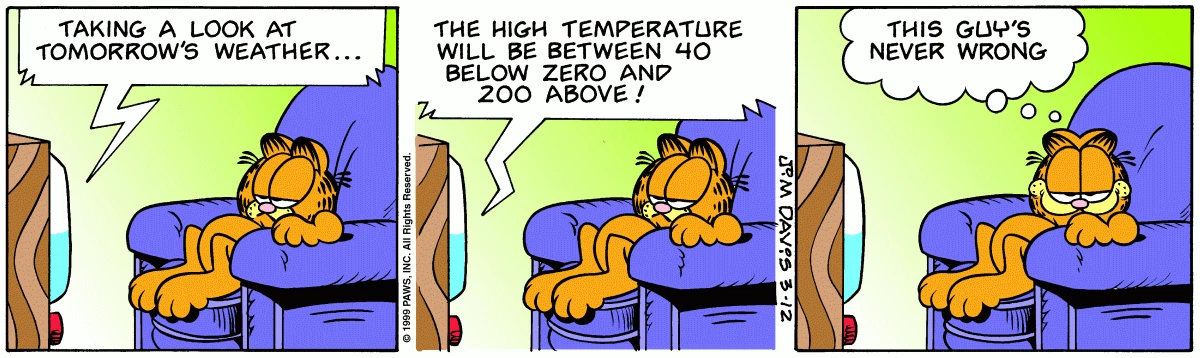

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats import chi2
import matplotlib.pyplot as plt
import random
import math

44.98090401540853

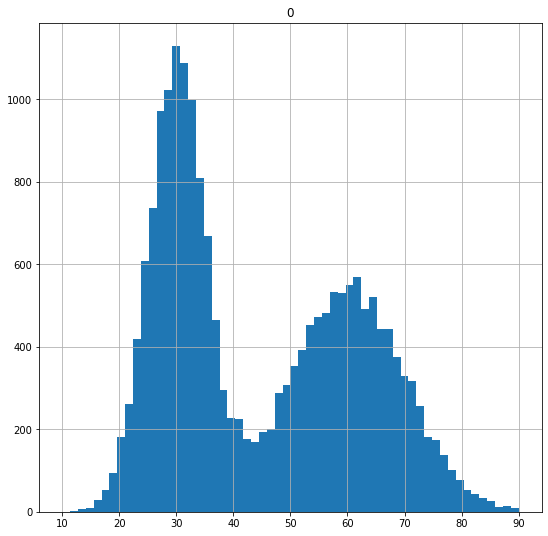

In [2]:
np.random.seed(10)
population_ages1 = stats.norm.rvs(30, 5, size=10000)
population_ages2 = stats.norm.rvs(60, 10, size=10000)
population_ages = np.concatenate((population_ages1, population_ages2))
pd.DataFrame(population_ages).hist(bins=58,
                                  range=(10,90),
                                  figsize=(9,9))

# print( stats.skew(population_ages) );
population_ages.mean()

#Point estimate

In [9]:
# np.random.seed(6)
sample_ages = np.random.choice(a= population_ages,
                               size=30)            # Sample 1000 values

print ( sample_ages.mean() )                         # Show sample mean

population_ages.mean() - sample_ages.mean()   # Check difference between means

41.584534087741424


3.396369927667102

# Confidence interval parameters

In [32]:
# Let's calculate a 95% confidence for our mean point estimate:
# Population variation
# Sample size
# Confidence level

# np.random.seed(10)
population_ages = stats.norm.rvs(30, 10, size=10000)
sample_size = 30
sample = np.random.choice(a= population_ages, size = sample_size)
sample_mean = sample.mean()
print(sample.mean())

z_critical = stats.norm.ppf(q = 0.95)  # Get the z-critical value*

print("z-critical value:")              # Check the z-critical value
print(z_critical)                        

pop_stdev = population_ages.std()  # Get the population standard deviation

margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

print("Confidence interval:")
print(confidence_interval)

30.218854576326937
z-critical value:
1.6448536269514722
Confidence interval:
(27.21874944879571, 33.21895970385817)


#Normal vs Non-normal population dist (Exact vs Approximate)

In [ ]:
# Let's create several confidence intervals and plot them to get a better sense of what it means to "capture" the true mean:

# np.random.seed(12)
# population_ages = stats.norm.rvs(30, 5, size=10000)
population_ages = stats.chi2.rvs(20,10, size=10000)
sample_size = 30
print(population_ages.mean())

intervals = []
sample_means = []
capture_mean=0
trial=25

for sample in range(trial):
    sample = np.random.choice(a= population_ages, size = sample_size)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)

    z_critical = stats.norm.ppf(q = 0.975)  # Get the z-critical value*         

    pop_stdev = population_ages.std()  # Get the population standard deviation

    stats.norm.ppf(q = 0.025)

    margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))

    confidence_interval = (sample_mean - margin_of_error,
                           sample_mean + margin_of_error)  
    if sample_mean - margin_of_error <30.0 and sample_mean + margin_of_error>30.0:
      capture_mean=capture_mean+1
    
    intervals.append(confidence_interval)
print ('# of interval captures the mean: ' , capture_mean)
plt.figure(figsize=(9,9))

plt.errorbar(x=np.arange(0.1, trial, 1), 
             y=sample_means, 
             yerr=[(top-bot)/2 for top,bot in intervals],
             fmt='o')

plt.hlines(xmin=0, xmax=trial,
           y=30., 
           linewidth=2.0,
           color="red");

# Popluation std is unknown

In [ ]:
# Let's take a new, smaller sample and then create a confidence interval without the population standard deviation, using the t-distribution:

np.random.seed(10)

sample_size = 25
sample = np.random.choice(a= population_ages, size = sample_size)
sample_mean = sample.mean()

t_critical = stats.t.ppf(q = 0.975, df=24)  # Get the t-critical value*

print("t-critical value:")                  # Check the t-critical value
print(t_critical)                        

sample_stdev = sample.std(ddof=1)    # Get the sample standard deviation

sigma = sample_stdev/math.sqrt(sample_size)  # Standard deviation estimate
margin_of_error = t_critical * sigma

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

print("Confidence interval:")
print(confidence_interval)

t-critical value:
2.0638985616280205
Confidence interval:
(37.65147508161371, 48.108524918386294)


In [50]:
# Check the difference between critical values of t and N Dists with a sample size of 1000
             
stats.t.ppf(q=0.975, df= 5) - stats.norm.ppf(0.975) 

0.08230847176118328

In [ ]:
# Instead of calculating a confidence interval for a mean point estimate by hand, you can calculate it using the Python function stats.t.interval():

stats.t.interval(alpha = 0.95,              # Confidence level
                 df= 24,                    # Degrees of freedom
                 loc = sample_mean,         # Sample mean
                 scale = sigma)             # Standard deviation estimate

(37.65147508161371, 48.108524918386294)

# Proportion

In [52]:
# Let's calculate a 95% confidence interval for students according to the sample proportion we calculated earlier (0.65):

z_critical = stats.norm.ppf(0.975)      # Record z-critical value

p = 0.65                                # Point estimate of proportion

n = 100                                 # Sample size

margin_of_error = z_critical * math.sqrt((p*(1-p))/n)

confidence_interval = (p - margin_of_error,  # Calculate the the interval
                       p + margin_of_error) 

confidence_interval

(0.5565156760890944, 0.7434843239109057)

In [53]:
# we can use the scipy stats.distribution.interval() function to calculate a confidence interval for a population proportion

stats.norm.interval(alpha = 0.95,    # Confidence level             
                   loc =  0.65,     # Point estimate of proportion
                   scale = math.sqrt((p*(1-p))/n))  # Scaling factor

(0.5565156760890944, 0.7434843239109057)